# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 6 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 6]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_6,sin_time,cos_time
11,6.192648,17.110882,18.253512,16.136476,2121.742706,73500000000,31.166958,32.256659,28.610426,0.308828,...,22307.090730,24148.041177,20911.945622,85.849354,1.130489,2.281437,1.073491,1,1.224647e-16,-1.000000
12,8.419039,17.094251,18.265652,15.789381,2113.301859,83500000000,38.636019,40.251065,36.001099,0.318151,...,16474.118480,16954.163370,15683.965312,47.570930,1.442658,2.391959,1.347874,1,1.224647e-16,-1.000000
13,6.846505,17.177814,17.774541,16.768849,2119.552177,73500000000,38.348434,40.345707,36.866758,0.135564,...,17190.523660,17219.832084,16952.179620,88.563250,1.376956,2.283721,1.250756,1,1.224647e-16,-1.000000
49,8.868540,17.353415,18.461959,15.814342,2114.326609,73500000000,190.577149,193.722437,173.950657,0.418631,...,7917.023277,8474.387974,7204.754668,89.522022,1.204814,3.846755,1.161786,1,-8.660254e-01,0.500000
50,9.403091,17.242779,17.822939,16.460828,2113.137305,83500000000,196.020128,204.063509,196.002472,0.307459,...,7801.012785,8345.523848,7352.656897,84.904703,0.688722,2.028351,0.676013,1,-8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82966,12.361672,4.453328,4.490946,4.315968,4819.467079,83500000000,7.072978,7.184239,6.769559,0.000000,...,32693.675790,33675.329175,31475.465928,26.968102,0.000000,2.283157,0.000000,1,9.659258e-01,0.258819
82967,12.596448,4.494811,4.816636,4.147151,4824.776440,73500000000,14.023997,14.476732,13.299350,0.000000,...,28576.467700,29251.544490,26632.209114,125.432873,0.000000,0.780760,0.000000,1,9.659258e-01,0.258819
82980,12.003689,4.562548,4.840463,4.464255,4827.793957,83500000000,129.129206,132.306381,120.262614,0.000000,...,5897.208961,6288.001741,5618.975859,83.253349,0.000000,1.091074,0.000000,1,9.659258e-01,0.258819
82981,14.149046,4.444572,4.735181,4.118985,4822.518200,73500000000,269.725512,276.902106,259.845617,1.690084,...,3643.884024,3809.397962,3643.467700,85.765391,0.000000,1.201067,0.000000,1,9.659258e-01,0.258819


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCAD60A090>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCAD609050>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCAD608250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCAD5E3810>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9553057822723394


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
9                sin_time  0.788663  0.962468                   16
7             Particulate  0.794074  0.961952                   18
8     AbsoluteHumidityMin  0.794216  0.961938                   17
6          TemperatureMax  0.797743  0.961599                   19
10              Frequency  0.797920  0.961582                   15
5          TemperatureMin  0.801383  0.961248                   20
4            WindSpeedMin  0.804872  0.960910                   21
3            WindSpeedMax  0.806737  0.960728                   22
2               WindSpeed  0.808418  0.960564                   23
0             SYNOPCode_6  0.810493  0.960362                   25
1           WindDirection  0.811530  0.960260                   24
11               cos_time  0.913084  0.949692                   14
14  TemperatureDifference  0.940110  0.946670                   11
13    AbsoluteHumidityMax  0.945284  0.946081                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
9,sin_time,0.788663,0.962468,16
7,Particulate,0.794074,0.961952,18
8,AbsoluteHumidityMin,0.794216,0.961938,17
6,TemperatureMax,0.797743,0.961599,19
10,Frequency,0.797920,0.961582,15
5,TemperatureMin,0.801383,0.961248,20
4,WindSpeedMin,0.804872,0.960910,21
3,WindSpeedMax,0.806737,0.960728,22
2,WindSpeed,0.808418,0.960564,23
0,SYNOPCode_6,0.810493,0.960362,25


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\2577233247.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


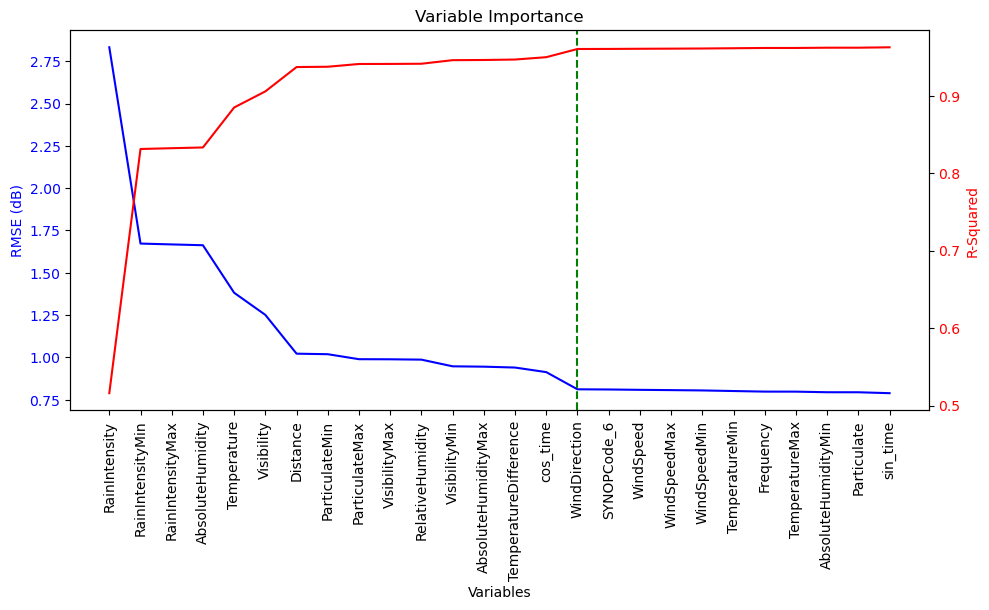

In [7]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [8]:
selected_features_RFL= [
    'WindDirection',
    'cos_time',
    'TemperatureDifference',
    'VisibilityMin',
    'RelativeHumidity',
    'VisibilityMax',
    'ParticulateMax',
    'AbsoluteHumidityMax',
    'Distance',
    'ParticulateMin',
    'Visibility',
    'Temperature',
    'AbsoluteHumidity',
    'RainIntensityMax',
    'RainIntensityMin',
    'RainIntensity'
  
]

In [9]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.9022211933130744
Test R^2: 0.948424987168942


# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 6 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 6]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_6,sin_time,cos_time
11,9.454984,17.110882,18.253512,16.136476,2121.742706,73500000000,31.166958,32.256659,28.610426,0.308828,...,22307.090730,24148.041177,20911.945622,85.849354,1.130489,2.281437,1.073491,1,1.224647e-16,-1.000000
12,10.225244,17.094251,18.265652,15.789381,2113.301859,83500000000,38.636019,40.251065,36.001099,0.318151,...,16474.118480,16954.163370,15683.965312,47.570930,1.442658,2.391959,1.347874,1,1.224647e-16,-1.000000
13,10.464235,17.177814,17.774541,16.768849,2119.552177,73500000000,38.348434,40.345707,36.866758,0.135564,...,17190.523660,17219.832084,16952.179620,88.563250,1.376956,2.283721,1.250756,1,1.224647e-16,-1.000000
49,9.688760,17.353415,18.461959,15.814342,2114.326609,73500000000,190.577149,193.722437,173.950657,0.418631,...,7917.023277,8474.387974,7204.754668,89.522022,1.204814,3.846755,1.161786,1,-8.660254e-01,0.500000
50,9.860963,17.242779,17.822939,16.460828,2113.137305,83500000000,196.020128,204.063509,196.002472,0.307459,...,7801.012785,8345.523848,7352.656897,84.904703,0.688722,2.028351,0.676013,1,-8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82966,9.388685,4.453328,4.490946,4.315968,4819.467079,83500000000,7.072978,7.184239,6.769559,0.000000,...,32693.675790,33675.329175,31475.465928,26.968102,0.000000,2.283157,0.000000,1,9.659258e-01,0.258819
82967,10.592875,4.494811,4.816636,4.147151,4824.776440,73500000000,14.023997,14.476732,13.299350,0.000000,...,28576.467700,29251.544490,26632.209114,125.432873,0.000000,0.780760,0.000000,1,9.659258e-01,0.258819
82980,20.593353,4.562548,4.840463,4.464255,4827.793957,83500000000,129.129206,132.306381,120.262614,0.000000,...,5897.208961,6288.001741,5618.975859,83.253349,0.000000,1.091074,0.000000,1,9.659258e-01,0.258819
82981,21.019652,4.444572,4.735181,4.118985,4822.518200,73500000000,269.725512,276.902106,259.845617,1.690084,...,3643.884024,3809.397962,3643.467700,85.765391,0.000000,1.201067,0.000000,1,9.659258e-01,0.258819


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCB8C13CD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCB8C11E50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCB8C12AD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DCB8C09090>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9371062401891829


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
10              WindSpeed  1.035096  0.942822                   15
8            WindSpeedMax  1.035320  0.942797                   17
7        RainIntensityMax  1.036439  0.942673                   18
6            WindSpeedMin  1.037323  0.942575                   19
9          TemperatureMin  1.038294  0.942468                   16
5     AbsoluteHumidityMin  1.041650  0.942095                   20
4        RainIntensityMin  1.042920  0.941954                   21
3     AbsoluteHumidityMax  1.045014  0.941721                   22
2           WindDirection  1.048856  0.941292                   23
0             SYNOPCode_6  1.049485  0.941221                   25
1               Frequency  1.049521  0.941217                   24
11               sin_time  1.052265  0.940909                   14
13               cos_time  1.076118  0.938200                   12
12          RainIntensity  1.084753  0.937204                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
10,WindSpeed,1.035096,0.942822,15
8,WindSpeedMax,1.035320,0.942797,17
7,RainIntensityMax,1.036439,0.942673,18
6,WindSpeedMin,1.037323,0.942575,19
9,TemperatureMin,1.038294,0.942468,16
5,AbsoluteHumidityMin,1.041650,0.942095,20
4,RainIntensityMin,1.042920,0.941954,21
3,AbsoluteHumidityMax,1.045014,0.941721,22
2,WindDirection,1.048856,0.941292,23
0,SYNOPCode_6,1.049485,0.941221,25


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\1760712670.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


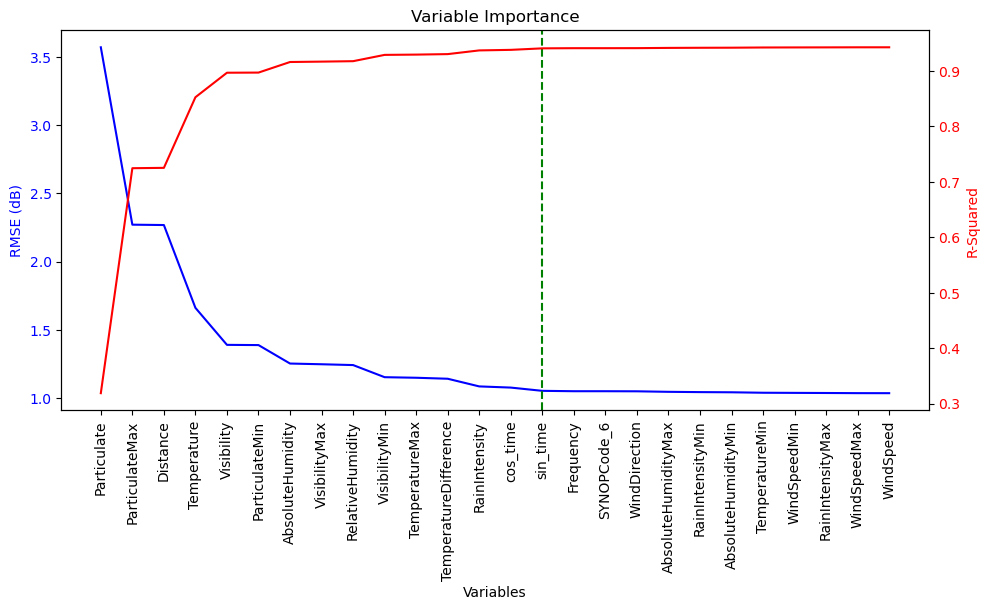

In [17]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 14
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [18]:
selected_features_FSO = [
    'RainIntensity',
    'TemperatureDifference',
    'TemperatureMax',
    'VisibilityMin',
    'RelativeHumidity',
    'VisibilityMax',
    'AbsoluteHumidity',
    'ParticulateMin',
    'Visibility',
    'Temperature',
    'Distance',
    'ParticulateMax',
    'Particulate'
]


In [19]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 1.1317748923451052
Test R^2: 0.92971017656087


In [21]:
 0.9364002314213495

0.9364002314213495

# Plot

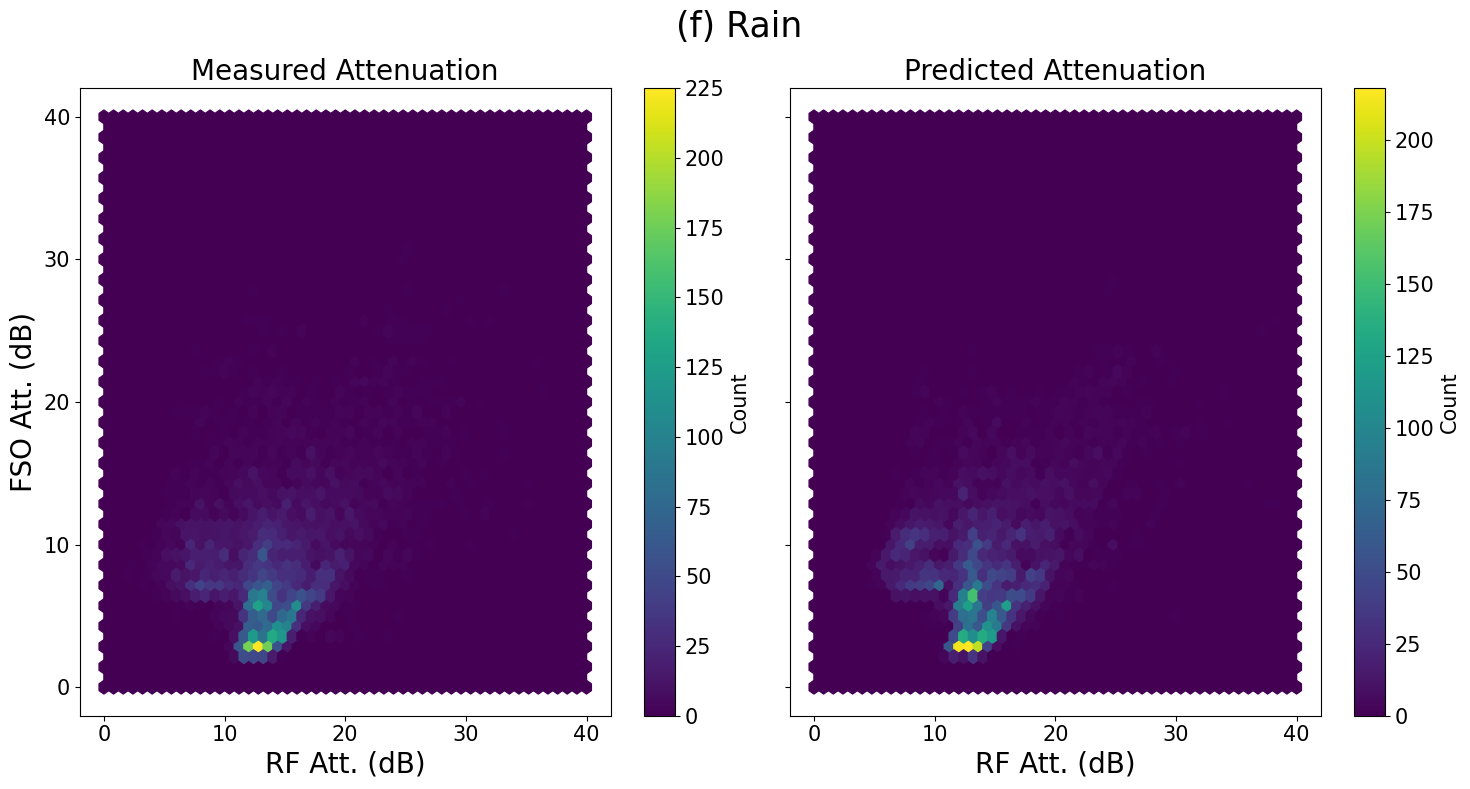

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(f) Rain ',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\2555491670.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\2555491670.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


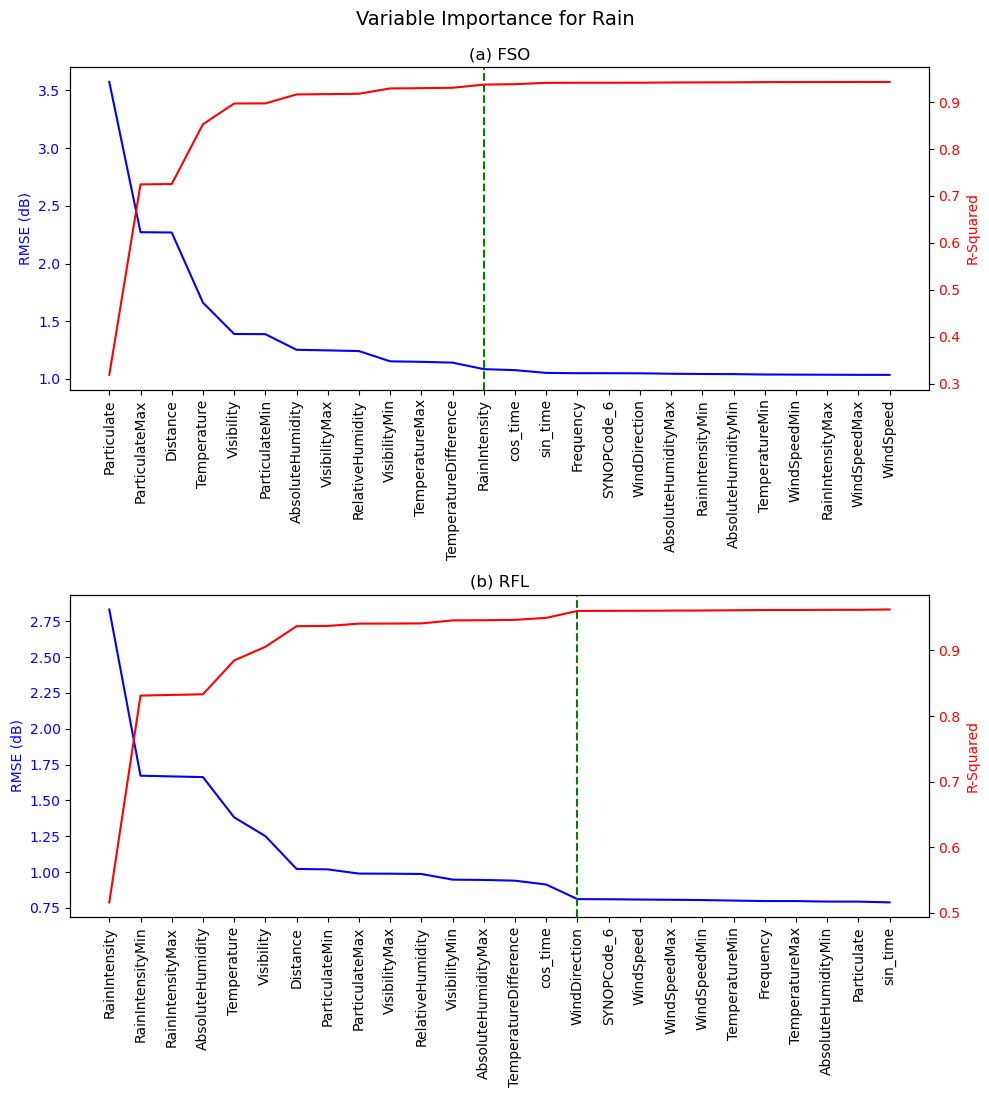

In [23]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 12  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Rain', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


# Method 2 (RFL)

## train

In [24]:
# Continue from where you've trained the final model on RFL data
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

# Generate Predicted RFL Attenuation on the training data
predicted_FSO_train_2 = final_model_FSO.predict(X_train_selected_FSO)
X_train_RFL['Predicted_FSO_Att_2'] = predicted_FSO_train_2  # Enhance the FSO training dataset

# Use final_model_FSO to predict FSO attenuation on the test data
predicted_FSO_test_2 = final_model_FSO.predict(X_test_selected_FSO)
X_test_RFL['Predicted_FSO_Att_2'] = predicted_FSO_test_2


# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_RFL_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_RFL_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_RFL_2 = RandomizedSearchCV(
    estimator=rf_RFL_2,
    param_distributions=param_distributions_RFL_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for FSO
random_search_RFL_2.fit(X_train_RFL, y_train_RFL)  

# Retrieve and apply the best hyperparameters
best_params_RFL_2 = random_search_RFL_2.best_params_
best_score_RFL_2 = random_search_RFL_2.best_score_
print(f"Best hyperparameters for RFL: {best_params_RFL_2}")
print(f"Best OOB score from RandomizedSearchCV for RFL: {best_score_RFL_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for RFL: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for RFL: 0.959048952272448


In [25]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL_2 = pd.DataFrame(X_train_RFL, columns=X_train_RFL.columns)
train_df_RFL_2['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL_2= rank_variables_oob(train_df_RFL_2, 'RFL_Att', best_params_RFL_2)
print(rankings_table_RFL_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
7             Particulate  0.763348  0.964839                   19
8                sin_time  0.763556  0.964820                   18
6          TemperatureMax  0.766976  0.964504                   20
10  TemperatureDifference  0.768167  0.964394                   16
5          TemperatureMin  0.771392  0.964094                   21
9     AbsoluteHumidityMin  0.771939  0.964043                   17
4            WindSpeedMin  0.774855  0.963771                   22
3            WindSpeedMax  0.776873  0.963582                   23
2               WindSpeed  0.777971  0.963479                   24
1           WindDirection  0.779874  0.963300                   25
0             SYNOPCode_6  0.780052  0.963283                   26
11              Frequency  0.791154  0.962231                   15
12          VisibilityMax  0.916649  0.949298                   14
13               cos_time  0.917075  0.949251                 

In [26]:
rankings_table_RFL_2

,Removed Variable,RSMSE,R^2,Remaining Variables
7,Particulate,0.763348,0.964839,19
8,sin_time,0.763556,0.964820,18
6,TemperatureMax,0.766976,0.964504,20
10,TemperatureDifference,0.768167,0.964394,16
5,TemperatureMin,0.771392,0.964094,21
9,AbsoluteHumidityMin,0.771939,0.964043,17
4,WindSpeedMin,0.774855,0.963771,22
3,WindSpeedMax,0.776873,0.963582,23
2,WindSpeed,0.777971,0.963479,24
1,WindDirection,0.779874,0.963300,25


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\3502387471.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


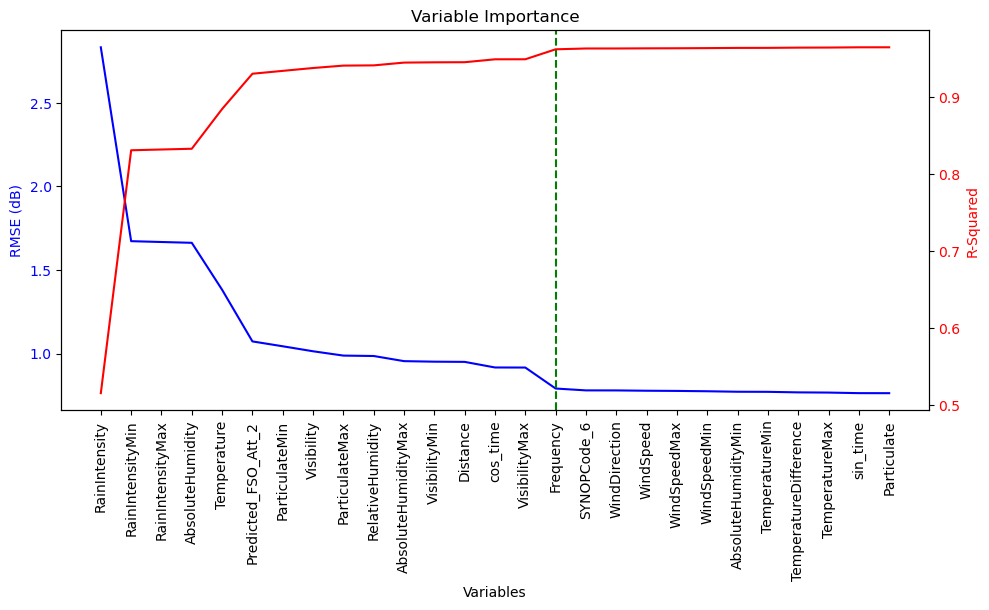

In [27]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL_2 = rankings_table_RFL_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_RFL_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [28]:
selected_features_RFL_2= [
    'Frequency',
    'VisibilityMax',
    'cos_time',
    'Distance',
    'VisibilityMin',
    'AbsoluteHumidityMax',
    'RelativeHumidity',
    'ParticulateMax',
    'Visibility',
    'ParticulateMin',
    'Predicted_FSO_Att_2',
    'Temperature',
    'AbsoluteHumidity',
    'RainIntensityMax',
    'RainIntensityMin',
    'RainIntensity'
   
]
# Select only the chosen features for training and testing
X_train_selected_RFL_2 = X_train_RFL[selected_features_RFL_2]
X_test_selected_RFL_2 = X_test_RFL[selected_features_RFL_2]


## Test

In [29]:
final_model_RFL_2 = RandomForestRegressor(
    n_estimators=best_params_RFL_2['n_estimators'],
    max_depth=best_params_RFL_2['max_depth'],
    min_samples_split=best_params_RFL_2['min_samples_split'],
    min_samples_leaf=best_params_RFL_2['min_samples_leaf'],
    bootstrap=best_params_RFL_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_RFL_2.fit(X_train_selected_RFL_2, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [30]:

# Now, predict RFL on the enhanced test data
predicted_RFL_test_2 = final_model_RFL_2.predict(X_test_selected_RFL_2)

# Calculate RMSE and R^2 for the test data to evaluate the RFL model
test_rmse_RFL_2 = mean_squared_error(y_test_RFL, predicted_RFL_test_2, squared=False)
test_r2_RFL_2 = r2_score(y_test_RFL, predicted_RFL_test_2)

print(f"Test RMSE for RFL: {test_rmse_RFL_2}")
print(f"Test R^2 for RFL: {test_r2_RFL_2}")


Test RMSE for RFL: 0.8026452775570686
Test R^2 for RFL: 0.9591811650170783


# Method 3 (FSO)

## train

In [31]:
# Continue from where you've trained the final model on RFL data
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

# Generate Predicted RFL Attenuation on the training data
predicted_RFL_train_2 = final_model_RFL.predict(X_train_selected_RFL)
X_train_FSO['Predicted_RFL_Att_2'] = predicted_RFL_train_2  
# Use final_model_RFL to predict RFL attenuation on the test data
predicted_RFL_test_2 = final_model_RFL.predict(X_test_selected_RFL)
# Enhance the FSO test dataset with these predictions
X_test_FSO['Predicted_RFL_Att_2'] = predicted_RFL_test_2

# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_FSO_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_FSO_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_FSO_2 = RandomizedSearchCV(
    estimator=rf_FSO_2,
    param_distributions=param_distributions_FSO_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for RFL
random_search_FSO_2.fit(X_train_FSO, y_train_FSO)  # Note: Using X_train_RFL not X_train_FSO

# Retrieve and apply the best hyperparameters
best_params_FSO_2 = random_search_FSO_2.best_params_
best_score_FSO_2 = random_search_FSO_2.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO_2}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9362826843256524


In [32]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO_2 = pd.DataFrame(X_train_FSO, columns=X_train_FSO.columns)
train_df_FSO_2['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO_2 = rank_variables_oob(train_df_FSO_2, 'FSO_Att', best_params_FSO_2)
print(rankings_table_FSO_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
8               WindSpeed  1.043480  0.941892                   18
10               sin_time  1.045916  0.941620                   16
7     AbsoluteHumidityMin  1.046651  0.941538                   19
5            WindSpeedMin  1.047322  0.941463                   21
6        RainIntensityMax  1.047418  0.941452                   20
9        RainIntensityMin  1.049918  0.941173                   17
4     AbsoluteHumidityMax  1.050761  0.941078                   22
3           RainIntensity  1.050919  0.941060                   23
2           WindDirection  1.054077  0.940706                   24
1               Frequency  1.054110  0.940702                   25
0             SYNOPCode_6  1.054923  0.940610                   26
12           WindSpeedMax  1.062867  0.939713                   14
11         TemperatureMin  1.066923  0.939252                   15
13               cos_time  1.077099  0.938087                 

In [33]:
rankings_table_FSO_2

,Removed Variable,RSMSE,R^2,Remaining Variables
8,WindSpeed,1.043480,0.941892,18
10,sin_time,1.045916,0.941620,16
7,AbsoluteHumidityMin,1.046651,0.941538,19
5,WindSpeedMin,1.047322,0.941463,21
6,RainIntensityMax,1.047418,0.941452,20
9,RainIntensityMin,1.049918,0.941173,17
4,AbsoluteHumidityMax,1.050761,0.941078,22
3,RainIntensity,1.050919,0.941060,23
2,WindDirection,1.054077,0.940706,24
1,Frequency,1.054110,0.940702,25


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\2645904425.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)


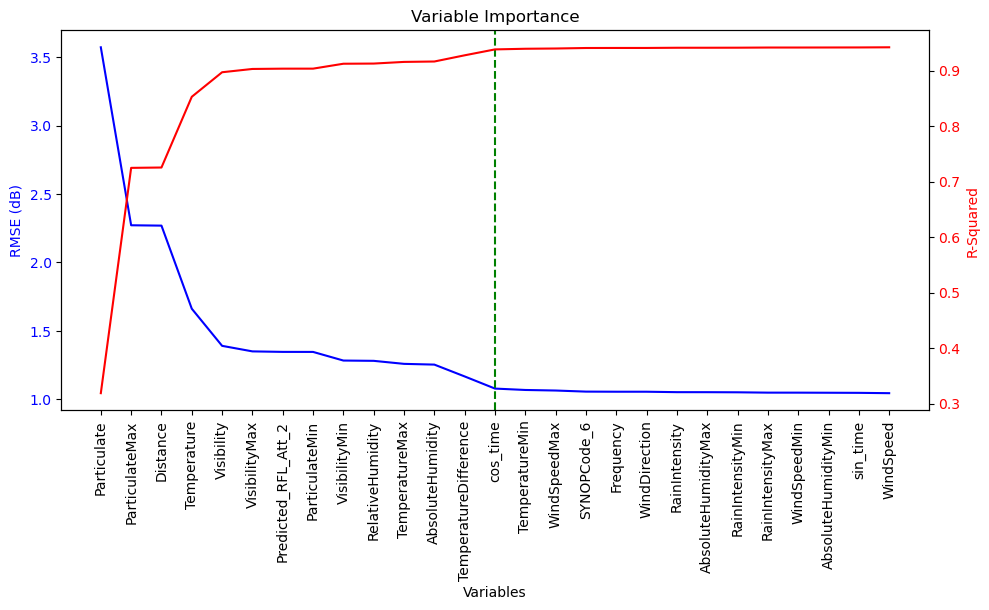

In [34]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO_2 = rankings_table_FSO_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 13
cutoff_variable = rankings_table_sorted_FSO_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [35]:
selected_features_FSO_2 = [
    'cos_time',
    'TemperatureDifference',
    'AbsoluteHumidity',
    'TemperatureMax',
    'RelativeHumidity',
    'VisibilityMin',
    'ParticulateMin',
    'Predicted_RFL_Att_2',
    'VisibilityMax',
    'Visibility',
    'Temperature',
    'Distance',
    'ParticulateMax',
    'Particulate'
]
# Select only the chosen features for training and testing
X_train_selected_FSO_2 = X_train_FSO[selected_features_FSO_2]
X_test_selected_FSO_2 = X_test_FSO[selected_features_FSO_2]


## Test

In [37]:
final_model_FSO_2 = RandomForestRegressor(
    n_estimators=best_params_FSO_2['n_estimators'],
    max_depth=best_params_FSO_2['max_depth'],
    min_samples_split=best_params_FSO_2['min_samples_split'],
    min_samples_leaf=best_params_FSO_2['min_samples_leaf'],
    bootstrap=best_params_FSO_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_FSO_2.fit(X_train_selected_FSO_2, y_train_FSO)


RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [38]:
# Use RF2 to predict FSO attenuation on the enhanced test data
predicted_FSO_2 = final_model_FSO_2.predict(X_test_selected_FSO_2)

# Calculate RMSE and R-squared on the FSO test data to evaluate RF2
test_rmse_FSO_2 = mean_squared_error(y_test_FSO, predicted_FSO_2, squared=False)
test_r2_FSO_2 = r2_score(y_test_FSO, predicted_FSO_2)

print(f"Test RMSE for FSO: {test_rmse_FSO_2}")
print(f"Test R^2 for FSO: {test_r2_FSO_2}")


Test RMSE for FSO: 1.0995205509997543
Test R^2 for FSO: 0.9336594535824483


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\3594136404.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_22020\3594136404.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


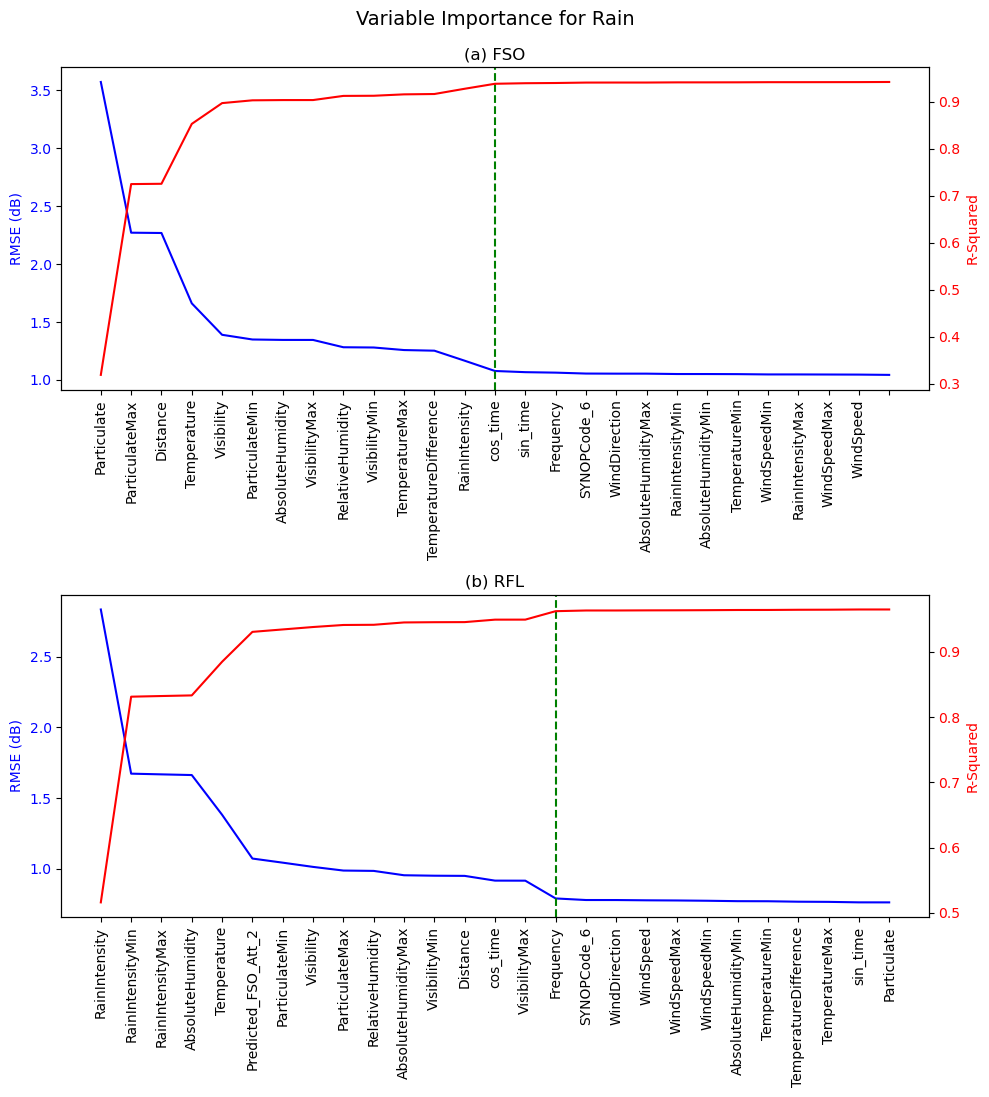

In [40]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 13  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO_2.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL_2.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Rain', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
